In [1]:
import numpy as np
from matplotlib import pyplot as plt

problem 2

In [2]:
eps_0 = 1 
Omega = 14
N = 14
V = 1

In [3]:

K_0 = np.zeros([N + 1, N +1])
K_plus = np.zeros([N + 1, N + 1])
K_minus = np.zeros([N + 1, N + 1])


k_0_max = N* .5
k_0_min = -N * .5

k_0_ket = []


k_0 = k_0_min

while (k_0 <= k_0_max):

    k_0_ket.append(k_0)
    k_0 += 1

k_0_bra = k_0_ket


print( len(k_0_ket))
print()

print(K_0[13][13])


15

0.0


In [4]:
def K_0_op(bra, ket):
    
    if bra == ket:
        result = ket
    
    else: 
        result =  0

    return result

def K_plus_op(K_proper, bra, ket): 

    if bra == (ket + 1):

        term1 = np.sqrt( K_proper * (K_proper + 1 )  -  ket * (ket + 1))   
        #term2 = np.sqrt( K_proper * (K_proper + 1 )  + (ket + 1) * ((ket + 1) + 1))

        return term1 #* term2

    else: 
        return 0


def K_minus_op(K_proper, bra, ket): 

    if bra == (ket - 1):

        term1 = np.sqrt( K_proper * (K_proper + 1 )  - ket * (ket - 1))
        #term2 = np.sqrt( K_proper * (K_proper + 1 )  + (ket - 1) * ((ket - 1) - 1))

        return term1 #* term2

    else: 
        return 0

In [5]:
for i in range(len(k_0_ket)):
    for j in range(len(k_0_bra)):
        K_0[i][j] = K_0_op(k_0_bra[j], k_0_ket[i]) 
        K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        K_minus[i][j] =  K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])


In [6]:
H =  eps_0 * K_0 + 0.5 * V* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus))

print(H)

[[-7.          0.          9.53939201  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -6.          0.         15.29705854  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 9.53939201  0.         -5.          0.         19.89974874  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         15.29705854  0.         -4.          0.         23.4520788
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.         19.89974874  0.         -3.          0.
  25.98076211  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.         23.4520788   0.         -2.
   0.         27.49545417  0.          0.          0.          0.
   0. 

In [7]:
np.linalg.eigh(H)[0]

array([-4.64308746e+01, -4.64296994e+01, -2.84249555e+01, -2.83611900e+01,
       -1.43497128e+01, -1.32637067e+01, -4.72033140e+00, -5.92866626e-15,
        4.72033140e+00,  1.32637067e+01,  1.43497128e+01,  2.83611900e+01,
        2.84249555e+01,  4.64296994e+01,  4.64308746e+01])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


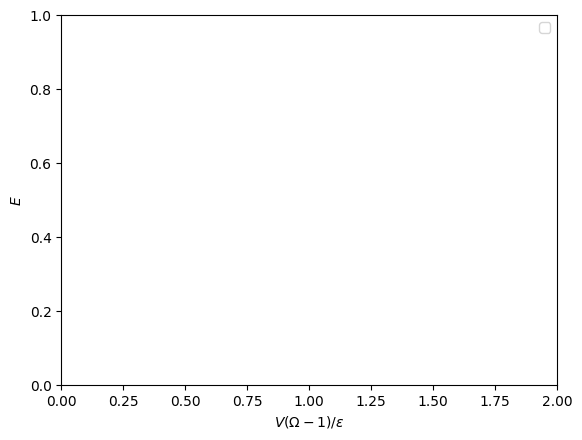

In [8]:
eps_0 = 1 
Omega = 14
V_mesh = np.linspace(0 ,2 * eps_0/(Omega - 1) , 100)
weird_mesh = np.linspace(0 ,2 , 100)

r_list = [-1,1,-1, 1, -1, 1, -1, -1 ,1 ,-1 ,1, -1,1, -1 ,1 ,-1 ,-1 ,1]

for b in range(15):

    E_val = []

    for c in range(len(V_mesh)):
        for i in range(len(k_0_ket)):
            for j in range(len(k_0_bra)):
                K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
                K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
                K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
        H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))
        

        E_val.append(np.linalg.eigh(H)[0][b])
    
    #plt.plot(weird_mesh,E_val)
    #plt.text(weird_mesh[0],E_val[0]+.05, r"$r = $" + str(r_list[b]), fontsize =10)

plt.ylabel(r"$E$")
plt.xlabel(r"$V(\Omega - 1)/ \epsilon$")

plt.legend()
plt.xlim(0,2)


plt.legend()
#plt.ylim(-20,20)

In [9]:
for i in range(len(k_0_ket)):
    for j in range(len(k_0_bra)):
        K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
        K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
H =  eps_0 *K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))
print(H)

[[-7.          0.          1.46759877  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -6.          0.          2.35339362  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 1.46759877  0.         -5.          0.          3.06149981  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          2.35339362  0.         -4.          0.          3.60801212
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          3.06149981  0.         -3.          0.
   3.99704033  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          3.60801212  0.         -2.
   0.          4.23006987  0.          0.          0.          0.
   0.

3
5
7
9
11
13
15


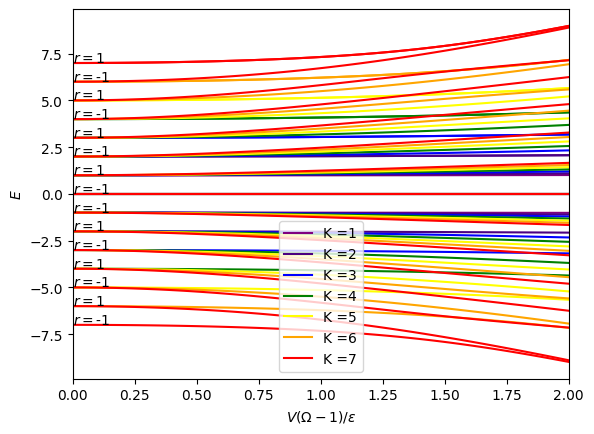

In [10]:
colors = [0, "purple", "indigo", "blue", "green", "yellow", 'orange', "red","m" ]
linetype = [0,":", "-.", ":", "-.", ":", "-.",":", "-."]

for N in range(1,8):
    K_0 = np.zeros([2 * N + 1, 2*N +1])
    K_plus = np.zeros([2 * N + 1, 2*N + 1])   
    K_minus = np.zeros([2*N + 1, 2 * N + 1])


    k_0_max = N
    k_0_min = -N 

    k_0_ket = []


    k_0 = k_0_min

    while (k_0 <= k_0_max):

        k_0_ket.append(k_0)
        k_0 += 1

        k_0_bra = k_0_ket

    print( len(k_0_ket))


    eps_0 = 1 
    Omega = 14
    V_mesh = np.linspace(0 ,2 * eps_0/(Omega - 1) , 100)
    weird_mesh = np.linspace(0 ,2 , 100)


    for b in range(2 *N +1):

        E_val = []

        for c in range(len(V_mesh)):
            for i in range(len(k_0_ket)):
                for j in range(len(k_0_bra)):
                    K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
                    K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
                    K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
            H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))
        

            E_val.append(np.linalg.eigh(H)[0][b])
    
        plt.plot(weird_mesh, E_val,color = colors[N])
    
    plt.plot(weird_mesh, E_val,color = colors[N], label = "K =" + str(N))


eps_0 = 1 
Omega = 14
V_mesh = np.linspace(0 ,2 * eps_0/(Omega - 1) , 100)
weird_mesh = np.linspace(0 ,2 , 100)

r_list = [-1,1,-1, 1, -1, 1, -1, -1 ,1 ,-1 ,1, -1,1, -1 ,1 ,-1 ,-1 ,1]

for b in range(15):

    E_val = []

    for c in range(len(V_mesh)):
        for i in range(len(k_0_ket)):
            for j in range(len(k_0_bra)):
                K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
                K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
                K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
        H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))
        

        E_val.append(np.linalg.eigh(H)[0][b])
    
    #plt.plot(weird_mesh,E_val)
    plt.text(weird_mesh[0],E_val[0]+.05, r"$r = $" + str(r_list[b]), fontsize =10)



    plt.ylabel(r"$E$")
    plt.xlabel(r"$V(\Omega - 1)/ \epsilon$")

    plt.legend()
    plt.xlim(0,2)


## Problem 3

In [11]:
eps_0 = 1 
Omega = 14
V_3 = eps_0 * 1/ (Omega -1)

for i in range(len(k_0_ket)):
    for j in range(len(k_0_bra)):
        K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
        K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
H =  eps_0 *K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))

print(np.linalg.eigh(H)[0][0])
print(np.linalg.eigh(H)[0][1])

-8.982597807197434
-8.894519710453078


## Problem 4

## Problem 5

In [12]:
sigma = np.array([[1,0],
                 [0,-1]])

print(np.matmul(sigma, sigma ))

minus_ket = np.array([0,1])
minus_bra = minus_ket.T

plus_ket = np.array([1,0])
plus_bra = plus_ket.T

print(minus_bra)
print( np.matmul(np.matmul(minus_bra,sigma), plus_ket) )

[[1 0]
 [0 1]]
[0 1]
0


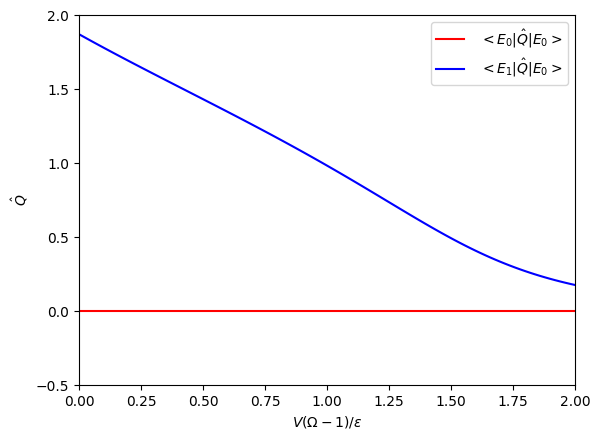

In [13]:
V = 1 
eps_0 = 1 
Omega = 14
V_mesh = np.linspace(0 ,2 * eps_0/(Omega - 1) , 100)
weird_mesh = np.linspace(0 ,2 , 100)

Q_ME = []
Q_x = []


for c in range(len(V_mesh)):
    for i in range(len(k_0_ket)):
        for j in range(len(k_0_bra)):
            K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
            K_plus[i][j] = K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
            K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])

    H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))
    Q = .5 * (K_plus + K_minus)

    gs_ket = np.linalg.eigh(H)[1].T[0]
    gs_bra = gs_ket.T
    fx_ket = np.linalg.eigh(H)[1].T[1]
    fx_bra = fx_ket.T


    Qx = abs(np.dot(gs_bra,np.dot( Q, gs_ket)))
    Q_exp = abs(np.dot(fx_bra,np.dot( Q, gs_ket)))

    Q_ME.append(Q_exp)
    Q_x.append(Qx)



plt.plot(weird_mesh, Q_x, color = "red" ,label = r" $<E_0|\hat Q| E_0>$" )
plt.plot(weird_mesh, Q_ME, color = "blue" ,label = r" $<E_1|\hat Q| E_0>$" )

plt.xlim(0,2)
plt.ylim(-.5,2)
plt.xlabel(r"$V(\Omega - 1)/ \epsilon$")
plt.ylabel(r"$\hat Q$")
plt.legend()

## Problem 6

In [20]:
eps_0 =1
V = 0.1
N = 2
Omega = 2

K_plus = np.array([[ 0, 0, 0, 0, 0, 1],
                   [ 0, 0, 0, 0, 0, 1],
                   [ 1, 1, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0],
                   [ 0, 0, 0, 0, 0, 0],])

K_minus = K_plus.T 

#print(np.dot(K_plus, K_plus))
#print(np.dot(K_minus, K_minus))

K_0 =np.array([[0,0,0,0,0,0],
            [0,0,0,0,0,0],
            [0,0,2,0,0,0],
            [0,0,0,0,0,0],
            [0,0,0,0,0,0],
            [0,0,0,0,0,-2],])

term1 = .5*eps_0 * K_0
term2 = -.5 * V *(np.dot(K_plus, K_plus) +np.dot(K_minus, K_minus) )

H = term1 + term2

print(H)
print()
print(np.linalg.eigh(H)[0])

[[ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   1.   0.   0.  -0.1]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.1  0.   0.  -1. ]]

[-1.00498756  0.          0.          0.          0.          1.00498756]


In [15]:
N = 2
K_0 = np.zeros([2 * N + 1, 2*N +1])
K_plus = np.zeros([2 * N + 1, 2*N + 1])   
K_minus = np.zeros([2*N + 1, 2 * N + 1])


k_0_max = N
k_0_min = -N 

k_0_ket = []


k_0 = k_0_min

while (k_0 <= k_0_max):

    k_0_ket.append(k_0)
    k_0 += 1

    k_0_bra = k_0_ket

print( len(k_0_ket))


Omega = 2
V_mesh = np.linspace(0 ,2 * eps_0/(Omega - 1) , 100)
weird_mesh = np.linspace(0 ,2 , 100)

r_list = [-1,1,-1, 1, -1, 1, -1, -1 ,1 ,-1 ,1, -1,1, -1 ,1 ,-1 ,-1 ,1]

for b in range(6):

    E_val = []

    for c in range(len(V_mesh)):
        for i in range(len(k_0_ket)):
            for j in range(len(k_0_bra)):
                K_0[i][j] = eps_0 * K_0_op(k_0_bra[j], k_0_ket[i]) 
                K_plus[i][j] =  K_plus_op(k_0_max,k_0_bra[j], k_0_ket[i])
                K_minus[i][j] = K_minus_op(k_0_max,k_0_bra[j], k_0_ket[i])
        
        H =  K_0 + (.5 * V_mesh[c]* (np.matmul(K_plus, K_plus) +  np.matmul(K_minus, K_minus)))
        

        E_val.append(np.linalg.eigh(H)[0][b])
    
    #plt.plot(weird_mesh,E_val)

5


IndexError: index 5 is out of bounds for axis 0 with size 5